In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('cardio_train.csv', sep = ';')

In [5]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [7]:
df.shape

(70000, 13)

In [9]:
from sklearn.model_selection import train_test_split

In [73]:
x = df.drop(['cardio'], axis = 1)
y = df['cardio']

In [75]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.85, random_state = 42)

In [77]:
x_train

,id,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,yr
3218,4537,1,163,62.0,120,80,1,1,0,0,1,50.0
28149,40241,2,177,73.0,120,80,1,1,0,0,0,60.0
11324,16194,1,163,70.0,120,80,1,1,0,0,1,52.0
26355,37650,1,155,70.0,150,100,1,1,0,0,1,54.0
52672,75147,1,170,69.0,150,90,1,1,0,0,1,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...
37194,53137,2,170,75.0,150,80,1,1,1,0,1,44.0
6265,8918,2,162,73.0,160,90,1,1,0,0,1,64.0
54886,78302,1,169,74.0,120,80,1,1,0,0,1,65.0
860,1197,1,167,70.0,120,80,1,1,0,0,0,50.0


In [29]:
df['gender'].value_counts()

gender
1    45530
2    24470
Name: count, dtype: int64

<Axes: xlabel='gender', ylabel='count'>

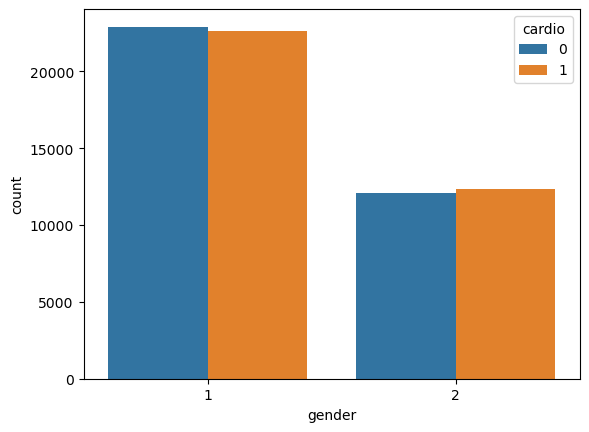

In [31]:
sns.countplot(x = 'gender', hue = 'cardio', data = df)

In [33]:
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [39]:
df['yr'] = (df['age']/365).round()

In [41]:
df['yr']

0        50.0
1        55.0
2        52.0
3        48.0
4        48.0
         ... 
69995    53.0
69996    62.0
69997    52.0
69998    61.0
69999    56.0
Name: yr, Length: 70000, dtype: float64

<Axes: xlabel='yr', ylabel='count'>

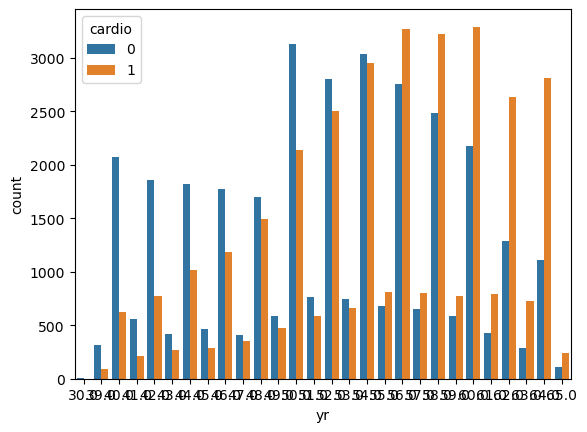

In [43]:
sns.countplot(x = 'yr', hue = 'cardio', data = df)

In [47]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,yr
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700,53.338686
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003,6.765294
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,30.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,54.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,65.000000


In [49]:
df.corr()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,yr
id,1.000000,0.003457,0.003502,-0.003038,-0.001830,0.003356,-0.002529,0.006106,0.002467,-0.003699,0.001210,0.003755,0.003799,0.003050
age,0.003457,1.000000,-0.022811,-0.081515,0.053684,0.020764,0.017647,0.154424,0.098703,-0.047633,-0.029723,-0.009927,0.238159,0.999090
gender,0.003502,-0.022811,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109,-0.023017
height,-0.003038,-0.081515,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821,-0.081456
weight,-0.001830,0.053684,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660,0.053661
ap_hi,0.003356,0.020764,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475,0.020793
ap_lo,-0.002529,0.017647,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719,0.017754
cholesterol,0.006106,0.154424,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147,0.154386
gluc,0.002467,0.098703,-0.020491,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307,0.098596
smoke,-0.003699,-0.047633,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486,-0.047884


In [120]:
df = df.drop('id', axis = 1)

In [122]:
df

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,yr
0,2,168,62.0,110,80,1,1,0,0,1,0,50.0
1,1,156,85.0,140,90,3,1,0,0,1,1,55.0
2,1,165,64.0,130,70,3,1,0,0,0,1,52.0
3,2,169,82.0,150,100,1,1,0,0,1,1,48.0
4,1,156,56.0,100,60,1,1,0,0,0,0,48.0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,2,168,76.0,120,80,1,1,1,0,1,0,53.0
69996,1,158,126.0,140,90,2,2,0,0,1,1,62.0
69997,2,183,105.0,180,90,3,1,0,1,0,1,52.0
69998,1,163,72.0,135,80,1,2,0,0,0,1,61.0


In [132]:
x

,id,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,yr
0,0,2,168,62.0,110,80,1,1,0,0,1,50.0
1,1,1,156,85.0,140,90,3,1,0,0,1,55.0
2,2,1,165,64.0,130,70,3,1,0,0,0,52.0
3,3,2,169,82.0,150,100,1,1,0,0,1,48.0
4,4,1,156,56.0,100,60,1,1,0,0,0,48.0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,2,168,76.0,120,80,1,1,1,0,1,53.0
69996,99995,1,158,126.0,140,90,2,2,0,0,1,62.0
69997,99996,2,183,105.0,180,90,3,1,0,1,0,52.0
69998,99998,1,163,72.0,135,80,1,2,0,0,0,61.0


In [85]:
y

0        0
1        1
2        1
3        1
4        0
        ..
69995    0
69996    1
69997    1
69998    1
69999    0
Name: cardio, Length: 70000, dtype: int64

In [87]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.30, random_state = 42)

In [89]:
xtrain

,id,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,yr
68681,98125,1,160,64.0,120,90,3,1,0,0,1,56.0
19961,28510,2,167,65.0,120,80,3,3,0,0,0,62.0
11040,15795,1,160,66.0,120,90,1,1,0,0,1,62.0
27673,39560,1,163,55.0,125,90,3,1,0,0,1,62.0
22876,32677,1,158,85.0,150,80,3,1,0,0,1,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...
37194,53137,2,170,75.0,150,80,1,1,1,0,1,44.0
6265,8918,2,162,73.0,160,90,1,1,0,0,1,64.0
54886,78302,1,169,74.0,120,80,1,1,0,0,1,65.0
860,1197,1,167,70.0,120,80,1,1,0,0,0,50.0


In [91]:
from sklearn.ensemble import RandomForestClassifier

In [93]:
Rclf = RandomForestClassifier()

In [95]:
Rclf.fit(xtrain, ytrain)

RandomForestClassifier()

In [136]:
Rclf.score(xtest, ytest)

0.7219523809523809

In [99]:
from sklearn.tree import DecisionTreeClassifier

In [101]:
dclf = DecisionTreeClassifier()

In [103]:
dclf.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [134]:
dclf.score(xtest, ytest)

0.6299523809523809